In [2]:
import gym
import gym.envs.toy_text.frozen_lake as fl
import numpy as np

env = gym.make('FrozenLake-v0',is_slippery=False)    ## Use is_slippery to make environment stochastic or deterministic
env.render()


SFFF
FHFH
FFFH
HFFG


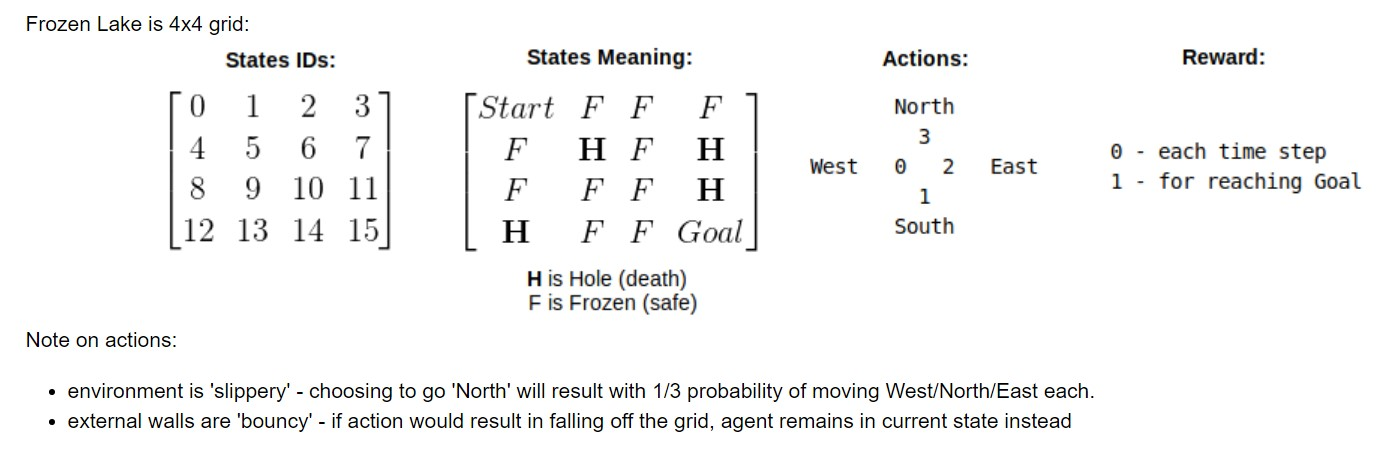

In [42]:
print(env.observation_space)   ## States
print(env.action_space)        ## Actions

Discrete(16)
Discrete(4)


In [43]:
# Four actions: UP, DOWN. LEFT, RIGHT
actions = {fl.LEFT: '\u2190', fl.DOWN: '\u2193', fl.RIGHT: '\u2192', fl.UP: '\u2191'}
print(actions)

{0: '←', 1: '↓', 2: '→', 3: '↑'}


In [3]:
#States
print(env.observation_space)

Discrete(16)


In [7]:
# For each action {0,1,2,3} you can get the tuple (Transition probability, Next State, Reward, Done)
env.P[0]

{0: [(1.0, 0, 0.0, False)],
 1: [(1.0, 4, 0.0, False)],
 2: [(1.0, 1, 0.0, False)],
 3: [(1.0, 0, 0.0, False)]}

In [10]:
# Define a deterministic policy pi, (i.e which action should agent select in a given state)

pi = 2*np.ones((env.observation_space.n), dtype=np.uint8)    # pi here is to always go right

print(pi)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


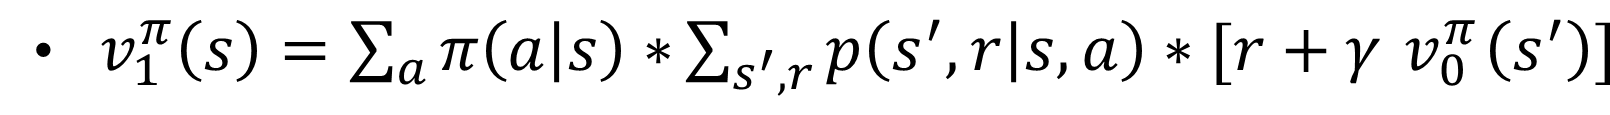

In [14]:
## Given a policy pi, repeatedly apply Bellman equations to determine the state values V_pi
nbStates = env.observation_space.n 
nbActions = env.action_space.n

V = np.zeros(nbStates)
gamma = 0.9

for i in range(20):
  V_i = np.zeros(nbStates)
  for s in range(nbStates-1):
    a = pi[s];                                                                       ## Select action 'a' in state 's' according to policy pi
    outcomes = env.unwrapped.P[s][a]                                                 ## Get the different possible outcomes of taking action 'a' in state 's' ?
    for o in outcomes:                                                               ## Loop through each outcome to compute value using Bellman eqution
      transition_prob = o[0]
      s_prime = o[1]
      reward = o[2]
      V_i[s] += transition_prob * (reward + gamma * V[s_prime])
      #print("s_prime=",s_prime,"V[s]=",V[s])
  V=V_i 
 
print(V)

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.9 1.  0. ]


In [15]:
np.reshape(V,(4,4))

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0.9, 1. , 0. ]])

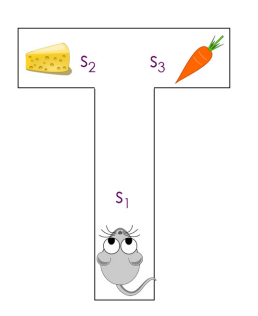

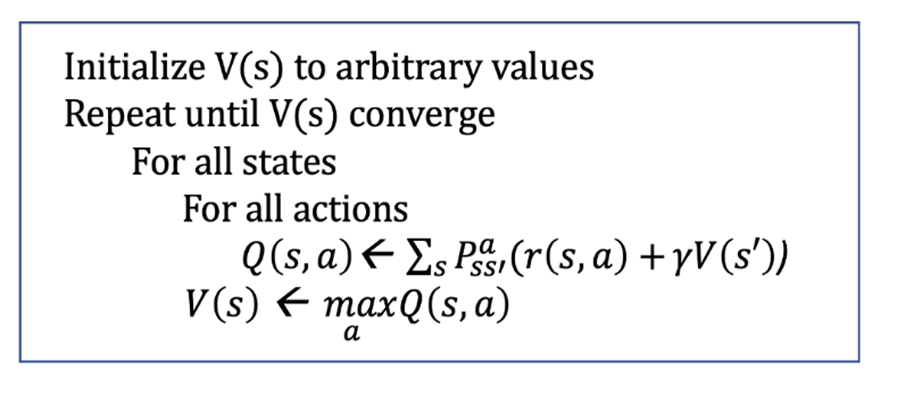